In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
mask = (digits.target == 0) | (digits.target == 1)
X = digits.data[mask]
y = digits.target[mask]
y= np.where(y == 0, -1, 1)
print("X.shape", X.shape)
print("X: ", X[:5])
print("len of X: ", len(X[0]))

X.shape (360, 64)
X:  [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
   0.  0.  0.  0.  1. 10. 13.  3.  0.  0.]
 [ 0.  0.  0.  0. 14. 13.  1.  0.  0.  0.  0.  5. 16. 16.  2.  0.  0.  0.
   0. 14. 16. 12.  0.  0.  0.  1. 10. 16. 16. 12.  0.  0.  0.  3. 12. 14.
  16.  9.  0.  0.  0.  0.  0.  5. 1

In [3]:
X = (X/16.0)*2 -1

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
X_train, y_train
len(X_train), len(y_train)

(252, 252)

In [6]:
class Perceptron:
    def __init__(self, retina_size, a1_units=32, a2_units=16, r_units=1, lr=0.1, epochs=10):
        self.retina_size = retina_size
        self.a1_units = a1_units
        self.a2_units = a2_units
        self.r_units = r_units
        self.lr = lr
        self.epochs = epochs

        # Fixed S -> A1: localized receptive fields
        self.S_A1 = np.zeros((retina_size, a1_units))
        for j in range(a1_units):
            receptive_field = np.random.choice(retina_size, size=np.random.randint(4, 8), replace=False)
            self.S_A1[receptive_field, j] = np.random.choice([-1, 1], size=len(receptive_field))

        # Fixed A1 -> A2: random full connections
        self.A1_A2 = np.random.choice([-1, 1], size=(a1_units, a2_units))

        # Trainable A2 -> R weights
        self.A2_R = np.zeros((a2_units, r_units))
        self.bias = np.zeros(r_units)
    

    def forward(self, X):
        # S -> A1
        a1_input = X @ self.S_A1
        a1_output = np.where(a1_input >= 0, 1, -1)

        # A1 -> A2
        a2_input = a1_output @ self.A1_A2
        a2_output = np.where(a2_input >= 0, 1, -1)

        # A2 -> R
        r_input = a2_output @ self.A2_R + self.bias
        r_output = np.where(r_input >= 0, 1, -1)
        return a1_output, a2_output, r_output

    def fit(self, X, y):
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                _, a2_out, r_out = self.forward(xi.reshape(1, -1))
                if r_out[0] != target:  # misclassified
                    update = self.lr * target
                    self.A2_R[:, 0] += update * a2_out.flatten()
                    self.bias[0] += update

    def predict(self, X):
        _, _, r_out = self.forward(X)
        return r_out.flatten()

In [7]:
model = Perceptron(retina_size=64, a1_units=32, a2_units=16, r_units=1, lr=0.1, epochs=10)

model.fit(X_train, y_train)

In [8]:
y_pred = model.predict(X_test)
acc = np.mean(y_pred == y_test)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.60


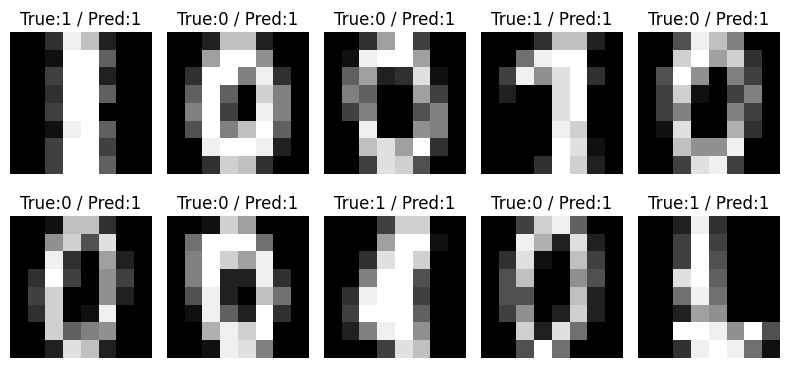

In [9]:
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
for ax, img, label, pred in zip(axes.ravel(), X_test, y_test, y_pred):
    ax.imshow((img.reshape(8, 8) + 1) / 2, cmap='gray')  # scale back to [0,1] for display
    ax.set_title(f"True:{'0' if label==-1 else '1'} / Pred:{'0' if pred==-1 else '1'}")
    ax.axis('off')
plt.tight_layout()
plt.show()